### Importing libraries

In [1]:
import numpy as np
import random,operator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Intialization

* input des données :

In [2]:
nbr_villes=15   
population_taille=30

* coordonnées des villes :

In [3]:
#Pour des coordonnées aléatoires de villes retirez les (""""""""")
"""""""""
x=np.random.uniform(0,1,nbr_villes)             
y=np.random.uniform(0,1,nbr_villes)
"""""""""

'\nx=np.random.uniform(0,1,nbr_villes)             \ny=np.random.uniform(0,1,nbr_villes)\n'

In [4]:
x = np.array([-0.0000000400893815,
-28.8732862244731230,
-79.2915791686897506,
-14.6577381710829471,
-64.7472605264735108,
-29.0584693142401171,
-72.0785319657452987,
-36.0366489745023770,
-50.4808382862985496,
-50.5859026832315024,
-0.1358203773809326,
-65.0865638413727368,
-21.4983260706612533,
-57.5687244704708050,
-43.0700258454450875])

In [5]:
y = np.array([0.0000000358808126,
-0.0000008724121069,
21.4033307581457670,
43.3895496964974043,
-21.8981713360336698,
43.2167287683090606,
-0.1815834632498404,
21.6135482886620949,
-7.3744722432402208,
21.5881966132975371,
28.7292896751977480,
36.0624693073746769,
-7.3194159498090388,
43.2505562436354225,
-14.5548396888330487])

In [6]:
cityList = []                      # liste des coordonnées de villes
for i in range(0,nbr_villes):
    cityList.append((x[i],y[i]))   # chaque ville i a une coordonné x et une coordonné y
cityList

[(-4.00893815e-08, 3.58808126e-08),
 (-28.873286224473123, -8.724121069e-07),
 (-79.29157916868975, 21.403330758145767),
 (-14.657738171082947, 43.389549696497404),
 (-64.74726052647351, -21.89817133603367),
 (-29.058469314240117, 43.21672876830906),
 (-72.0785319657453, -0.1815834632498404),
 (-36.03664897450238, 21.613548288662095),
 (-50.48083828629855, -7.374472243240221),
 (-50.5859026832315, 21.588196613297537),
 (-0.1358203773809326, 28.729289675197748),
 (-65.08656384137274, 36.06246930737468),
 (-21.498326070661253, -7.319415949809039),
 (-57.568724470470805, 43.25055624363542),
 (-43.07002584544509, -14.554839688833049)]

* creation d'une solution admissible (individu) par permutation (on note que la ville de départ est la meme) :

In [7]:
def creer_nv_individu(n_villes):

    pop=set(np.arange(n_villes,dtype=int))
    route=list(random.sample(pop,n_villes)) #route est un individu aléatoirement générer
    for i in range(len(route)):
        if route[i] == 0:
            route = np.roll(route, -i, axis=None)# np.roll inverse les tournées pour mettre la ville 0 (départ) toujours en premier sans changer la solution
            
    return route

* creation de la population initiale :

In [8]:
def cree_population_initial(taille,n_villes):
    population = []
    
    for i in range(0,taille):
        population.append(creer_nv_individu(n_villes))
        
    return population

### Graphe complet qui represente toutes les solutions possibles :

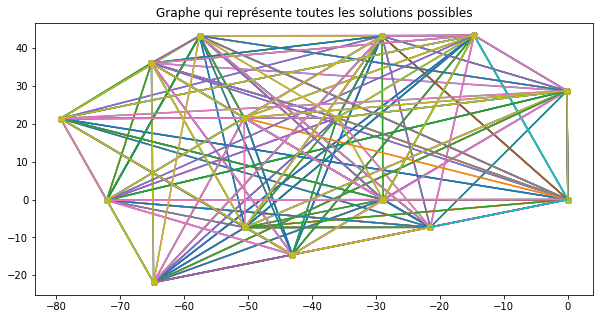

In [9]:
chemin = np.arange(nbr_villes)
population_initiale = cree_population_initial(population_taille,nbr_villes)
plt.figure(figsize=(10, 5))
for i in range(0, population_taille, 1):
    
    for j in range(0, nbr_villes, 1) :
        chemin[j]=population_initiale[i][j]
    
    plt.plot(x[chemin],y[chemin], marker= 'o')
    plt.plot([x[chemin[-1]],x[chemin[0]]],[y[chemin[-1]],y[chemin[0]]])
    plt.title("Graphe qui représente toutes les solutions possibles")

# Evaluation (Fitness):

* Calcul distance :

In [10]:
def distance(i,j):
    '''''''''''''''''''''''''''''''''''''''''''''''
    Calcul distance entre la ville i = [xi,yi] et la ville j = [xj,yj]
    '''''''''''''''''''''''''''''''''''''''''''''''
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)

* fitness d'un individu :

In [11]:
def fitness(route,CityList):
    '''''''''''''''''''''''''''''''''''
    Calcul de fitness de chaque individu
    '''''''''''''''''''''''''''''''''''
    score=0
    
    for i in range(len(route)-1):   #calcul distance entre chaque deux villes parcourues dans la solution donnée
        k=route[i] 
        l=route[i+1]
        score = score + distance(CityList[k],CityList[l]) 

    score = score + distance(cityList[route[-1]],cityList[route[0]])  #addition du chemin entre la dernière ville et la ville de départ
             
    return score

* Score de la population (liste de fitness des individus) :

In [12]:
def score_population(population, CityList):  
    '''''''''''''''''''''''''''''''''''''''''
    Calcul de fitness de toute une population
    '''''''''''''''''''''''''''''''''''''''''
    scores = []
  
    for i in population:
        scores.append(fitness(i, CityList))
    return scores

* affichage :

In [13]:
score = []
score = score_population(population_initiale, cityList)
for i in range(population_taille):
    print(population_initiale[i],"-------->" ,score[i])

[ 0 11 10  1 14  3  5  2  6 12  8 13  9  7  4] --------> 646.1725867501701
[ 0  7 11  2 13  9  1  8 12 10  5  4  6 14  3] --------> 545.0135891285655
[ 0 14  4  6 10  8  3  1 12 11  7  9 13  5  2] --------> 645.5944166500202
[ 0  7  5  4  2 14  1  8  9 10 11  6 13 12  3] --------> 665.9247679498297
[ 0  7  5 12  2 11  1 14  9  3  8  4 10  6 13] --------> 711.057403007947
[ 0  2 11  4  7 10 12  5  6 14  9  1  3  8 13] --------> 734.1653733140827
[ 0  1  4  6 13  9 12  8  3  7 11  5 14  2 10] --------> 612.8998909291356
[ 0 11 14  5  9  3 12  8  4  2 13 10  7  1  6] --------> 672.4859451324958
[ 0 12  2  3 11  1  9 13 10  4 14  6  7  8  5] --------> 689.071797991601
[ 0  4 12  8  7 13 14  2  9  6 11  1 10  5  3] --------> 597.021050652623
[ 0  5 14 11  9  1 12  4  8 10  3  2  7  6 13] --------> 648.2486434877537
[ 0 10  6  2 14  8 12  9  7 11 13  1  4  3  5] --------> 560.4689274998974
[ 0 13  6  9 12  7  5  3 10  4 11  8  2  1 14] --------> 626.6790034824963
[ 0  7  6 12  1 10 13  4  3 

# Sélection (Roullette) :

In [14]:
def selectOne(population):   # séléction d'un individu
    total = sum([fitness(c,cityList) for c in population])

    selection_prob = [fitness(c,cityList)/total for c in population] #proba de maximisation
    selection_probs = [(1-selection_prob[i])/(population_taille-1) for i in range(population_taille)] #proba de minimisation
    return population[np.random.choice(len(population), p=selection_probs)]  #séléction par roullette (proba aléatoire)
def selection(population):   # séléction de N/2 individus dans la population
    selected = []
    for i in range(int(len(population)/2)):
        selected.append(selectOne(population))
    return selected

# Croisement : 

In [15]:
def crossover(a,b): 

    child=[]
    childA=[]
    childB=[]

    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(b))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
   
    return child

In [16]:
def breedPopulation(selected):   # croisement des individus séléctionnés
    children=[]
    for i in range(len(selected)-1):
        children.append(crossover(selected[i],selected[i+1]))
    return children

# Mutation :

In [17]:
def mutate(route,probablity):  # mutation d'une route avec proba de mutation

    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))  # num aléatoire pour faire le changement
            
            temp1=route[swaping_p]                        # effectuation du changement
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route

In [18]:
def mutatePopulation(population, mutationRate): # mutation d'une population
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

# Meilleur Solution :

In [19]:
def rankRoutes(population,City_List): #fonction qui classe les individus dans une population par rapport à leurs fitness
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [20]:
def best_solution(population,city_List):   #fonction qui retourne la meilleur solution dans une population
    ranked_population = rankRoutes(population,city_List)
    i = ranked_population[0][0]
    solBest = population[i]
    return solBest

# Algorithme Génétique :

In [21]:
def nextGeneration(CityList,currentGen, mutationRate): # fonction qui effectue les opérateurs de l'algorithme génétique
    # selection des individus
    selectionResults = selection(currentGen)
    # croisement
    children = breedPopulation(selectionResults)
    # mutation
    nextGeneration = mutatePopulation(children, mutationRate)
    nextGeneration = nextGeneration + selectionResults 
    # addition de la meilleur solution de cette population dans la prochaine population 
    nextGeneration.append(best_solution(currentGen,CityList))
    return nextGeneration

In [22]:
def geneticAlgorithm(CityList,mutationRate,generations): # fonction algo génétique, entrées : coordonnés des villes, proba de mutation, nbr de générations
    
    bestfitness_pergen = []
    gen = []
    population = population_initiale

    # meilleur solution de la population initiale
    print("Meilleur route de la population intiale :",best_solution(population_initiale,CityList),"sa distance :",fitness(best_solution(population_initiale,CityList),CityList))
    
    # liste des meilleurs distances par génération
    bestfitness_pergen.append(fitness(best_solution(population_initiale,CityList),CityList))
    for i in range(0, generations):
        population = nextGeneration(CityList,population, mutationRate)
        bestfitness_pergen.append(fitness(best_solution(population,CityList),CityList))
        gen.append(i+1)
    
    # meilleur solution de la dernière population    
    route = best_solution(population,CityList)
    for i in range(len(route)):
        if route[i] == 0:
            route = np.roll(route, -i, axis=None)
    print("Meilleur route de la dernière population :",route,"sa distance :",fitness(route,CityList))
    
    plt.subplots(figsize=(15, 5))
    # graphe de la meilleur solution de la population initiale
    plt.subplot(1, 2, 1)
    plt.plot(x[best_solution(population_initiale,CityList)],y[best_solution(population_initiale,CityList)], marker= 'o', color='r')
    plt.plot([x[best_solution(population_initiale,CityList)[-1]],x[best_solution(population_initiale,CityList)[0]]],[y[best_solution(population_initiale,CityList)[-1]],y[best_solution(population_initiale,CityList)[0]]])
    plt.title("Meilleur solution de la population initiale")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    # graphe de la meilleur solution de la population terminale
    plt.subplot(1, 2, 2)
    plt.plot(x[route],y[route], marker= 'o', color='g')
    plt.plot([x[route[-1]],x[route[0]]],[y[route[-1]],y[route[0]]])
    plt.title('Meilleur route de la dernière population')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

    plt.tight_layout()
    plt.show()
    # graphe des distances par générations
    plt.figure(figsize=(15, 5))
    plt.plot(bestfitness_pergen)
    plt.title('Developpement de la distance par génération')
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Meilleur route de la population intiale : [ 0  7 13  2  3  5  9 11  6 14  4  1 12  8 10] sa distance : 501.2906961679408
Meilleur route de la dernière population : [ 0 10  3  5  1 12  8 14  4  6  2 11 13  9  7] sa distance : 335.38613020777177


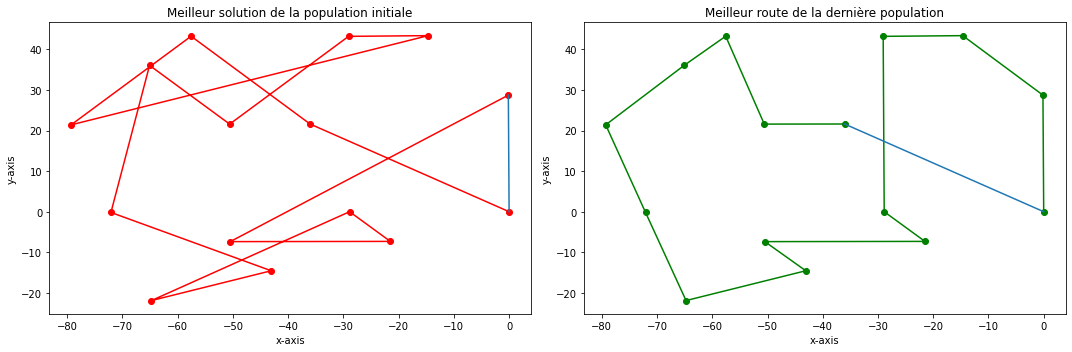

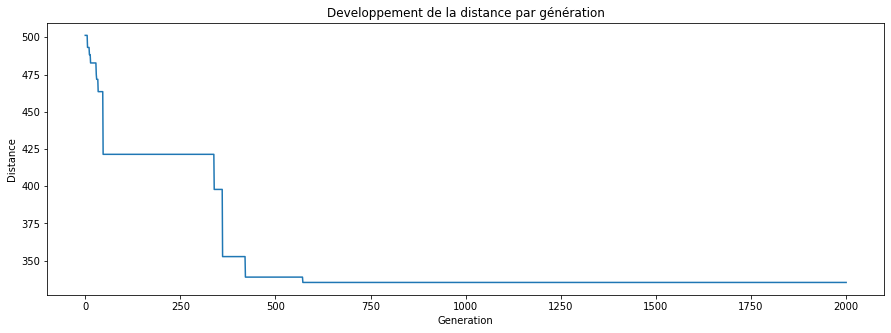

In [26]:
geneticAlgorithm(cityList,0.01,2000)   # application 4000 générations, proba de mutation 0.01